<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/mechanical_aeroespace_cap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Program that graphically shows maximum dynamic pressure (Max Q) as a function of
time for several different rocket launches

Produced for "Python for Mechanical and Aerospace Engineering" by Alex Kenan, ISBN 978-1-7360606-0-5 and 978-1-7360606-1-2.
Copyright © 2020 Alexander Kenan. Some Rights Reserved. This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
See http://creativecommons.org/licenses/by-nc-sa/4.0/ for more information.

NOTE: An older version of this file incorrectly calculated density, which resulted in computing an initial Max Q of nearly 1 billion psf.
This is the correct `density()` function that more accurately calculates density.

See `chap3_old.py` for the original `density()` function.
"""

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt



In [7]:
# Equations
def density(height: float) -> float:
    """
    Returns the air density in slug/ft^3 based on altitude
    Equations from https://www.grc.nasa.gov/www/k-12/rocket/atmos.html
    :param height: Altitude in feet
    :return: Density in slugs/ft^3
    """
    if height < 36152.0:
        temp = 59 - 0.00356 * height
        p = 2116 * ((temp + 459.7)/518.6)**5.256
    elif 36152 <= height < 82345:
        temp = -70
        p = 473.1*np.exp(1.73 - 0.000048*height)
    else:
        temp = -205.05 + 0.00164 * height
        p = 51.97*((temp + 459.7)/389.98)**-11.388

    rho = p/(1718*(temp+459.7))
    return rho

def velocity(time: float, acceleration: float) -> float:
    """
    Convert time to velocity using Vf = Vi + at
    (where Vf = final velocity,
    Vi = initial velocity, [0 in this case]
     a = acceleration, t = time
    :param time: int time in seconds
    :param acceleration: acceleration in ft/s^2
    :return: velocity in ft/s
    """
    return acceleration*time

def altitude(time: float, acceleration: float) -> float:
    """
    Convert time to altitude using the constant acceleration equation
    x = vi*t + 0.5*a*t^2, where vi = 0 in this case
    :param time: Time in seconds
    :param acceleration: acceleration in ft/s^2
    :return: Altitude in feet
    """
    return 0.5*acceleration*time**2



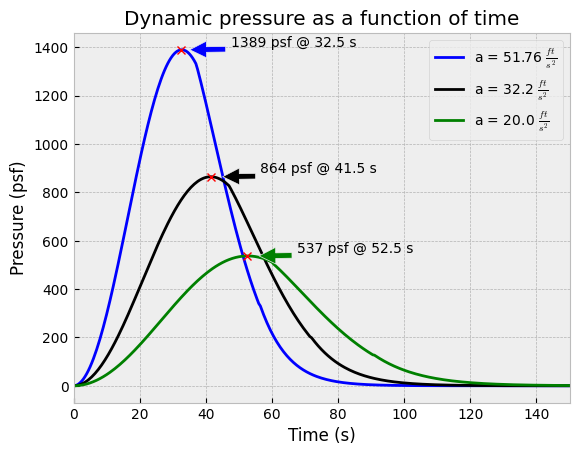

In [11]:
if __name__ == '__main__':
    plt.style.use('bmh')
    y_values = []
    x_values = np.arange(0.0, 550.0, 0.5)
    for elapsed_time in x_values:
        #
        '''
        Acceleration is the average acceleration
        to go from 0 ft/s to 26,400 ft/s
        (18,000 mph) in 8.5 minutes = 51.764705882 ft/s^2
        '''
        accel = 51.764705882
        alt = altitude(elapsed_time, accel)
        # Dynamic pressure q = 0.5*rho*V^2 = 0.5*density*velocity^2
        q = 0.5 * density(alt) * velocity(elapsed_time, accel) ** 2
        y_values.append(q)
    plt.plot(x_values, y_values, 'b-',
             label=r"a = 51.76 $\frac{ft}{s^2}$")
    max_val = max(y_values)
    ind = y_values.index(max_val)

    # Plot an arrow and text with the max value
    plt.annotate('{:.0f} psf @ {} s'.format(max_val, x_values[ind]),
                 xy=(x_values[ind] + 2, max_val),
                 xytext=(x_values[ind] + 15, max_val + 15),
                 arrowprops=dict(facecolor='blue', shrink=0.05),
                 )
    # plot the point of Max Q
    plt.plot(x_values[ind], max_val, 'rx')

    # Now let's make acceleration = 32.2 ft/s^2 (1g)
    y2_values = []
    for elapsed_time in x_values:
        accel = 32.2
        alt = altitude(elapsed_time, accel)
        q = 0.5 * density(alt) * velocity(elapsed_time, accel) ** 2
        y2_values.append(q)

    plt.plot(x_values, y2_values, 'k-',
             label=r"a = 32.2 $\frac{ft}{s^2}$")
    max_val = max(y2_values)
    ind = y2_values.index(max_val)

    # Plot an arrow and text with the max value
    plt.annotate('{:.0f} psf @ {} s'.format(max_val, x_values[ind]),
                 xy=(x_values[ind] + 3, max_val),
                 xytext=(x_values[ind] + 15, max_val + 15),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 )

    # plot the point of Max Q
    plt.plot(x_values[ind], max_val, 'rx')

    # Now let's make acceleration = 20.0 ft/s^2 (1g)
    y3_values = []
    for elapsed_time in x_values:
        accel = 20.0
        alt = altitude(elapsed_time, accel)
        q = 0.5 * density(alt) * velocity(elapsed_time, accel) ** 2
        y3_values.append(q)

    plt.plot(x_values, y3_values, 'g-',
             label=r"a = 20.0 $\frac{ft}{s^2}$")
    max_val = max(y3_values)
    ind = y3_values.index(max_val)

    # Plot an arrow and text with the max value
    plt.annotate('{:.0f} psf @ {} s'.format(max_val, x_values[ind]),
                 xy=(x_values[ind] + 3, max_val),
                 xytext=(x_values[ind] + 15, max_val + 15),
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 )

    # plot the point of Max Q
    plt.plot(x_values[ind], max_val, 'rx')

    plt.xlim(0, 150)
    plt.xlabel('Time (s)')
    plt.ylabel('Pressure (psf)')
    plt.title('Dynamic pressure as a function of time')
    plt.legend()
    plt.show()

